In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../datasets/placement.csv")
df.shape

(200, 2)

<Axes: xlabel='cgpa', ylabel='package'>

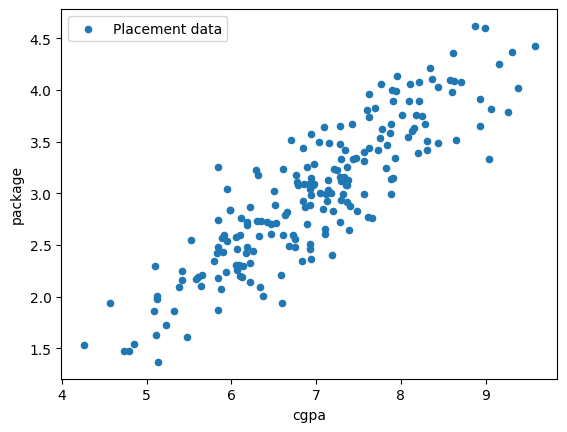

In [3]:
df.plot(x="cgpa", y="package", kind="scatter", label="Placement data")

In [4]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=2
)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
LR = LinearRegression()

In [8]:
LR.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = LR.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [10]:
LR.score(X_test, y_test)

0.780730147510384

In [11]:
m_sk, b_sk = float(LR.coef_[0]),float(LR.intercept_)
m_sk, b_sk

(0.557951973425072, -0.8961119222429144)

## From scratch

In [12]:
import numpy as np

class olseLR:
    
    def __init__(self):
        self.slope_     = None
        self.intercept_ = None

    def fit(self, X_train: np.array, y_train: np.array):
        
        self.slope_ = ( np.mean(X_train * y_train) - np.mean(X_train) * np.mean(y_train) ) / ( np.mean(X_train ** 2) - np.mean(X_train) ** 2 )
        self.intercept_ = np.mean(y_train) - self.slope_ * np.mean(X_train)

    def predict(self, X_test: np.array):
        
        if self.slope_ is None or self.intercept_ is None:
            raise ValueError("Model is not trained yet. Call 'fit' first.")
            
        y_pred = np.array(self.slope_ * X_test + self.intercept_)

        return y_pred

    def score(self, X_test, y_test, method: str = None):
        y_pred = self.predict(X_test)
        ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
        ss_residual = np.sum((y_test - y_pred) ** 2)

        R2 = 1 - (ss_residual / ss_total)
        n  = len(X_test)
        k  = 1

        if method == "adj":
            return 1 - ( (1 - R2) * (n - 1) / (n - 1 - k) )
        
        return 1 - (ss_residual / ss_total)

    def _mae(self, X_test, y_test):
        y_pred = self.predict(X_test)
        
        return np.mean(np.abs(y_pred - y_test))

    def _percent_score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        eps = 1e-10
        
        return np.mean( np.abs(y_pred - y_test) / (y_test + eps) ) * 100

    def _mse(self, X_test, y_test):
        y_pred = self.predict(X_test)

        return np.mean( (y_pred - y_test) ** 2 )

    def _rmse(self, X_test, y_test):
        
        return np.sqrt(self._mse(X_test, y_test))

In [13]:
mLR = olseLR()
mLR.fit(X_train.values.ravel(), y_train.values.ravel()))

In [14]:
y_pred = mLR.predict(X_test.values.ravel())

In [15]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [16]:
m, b = float(mLR.slope_),float(mLR.intercept_)
m, b

(0.5579519734250811, -0.8961119222429779)

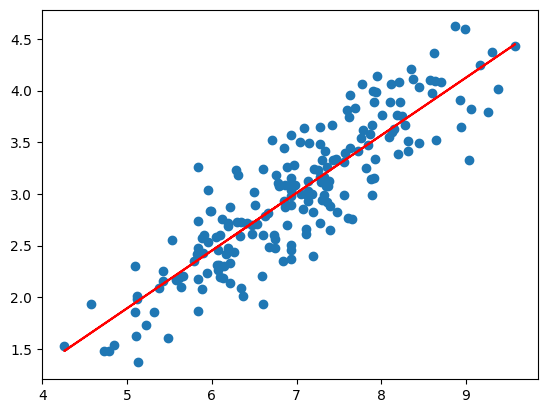

In [22]:
best_fit_line = [((m * x) + b) for x in X.values]
best_fit_line_sk = [((m_sk * x) + b_sk) for x in X.values]

# Visualizing model over test data
# A scatter plot and the aforementioned best-fit-line is plotted using matplotlib.pyplot
plt.scatter(X.values, y.values)
plt.plot(X.values, mLR.predict(X.values.ravel()), label=f'y = {m}x + {b}', color="red")
# plt.plot(X.values, best_fit_line_sk, label=f'y = {m}x + {b}', color="black")

In [217]:
mLR.score(X_test.values.flatten(), y_test.values.flatten())

np.float64(0.7807301475103863)

In [218]:
LR.score(X_test, y_test)

0.780730147510384

## Accuracy Metrics

In [219]:
mLR._mae(X_test.values.flatten(), y_test.values.flatten())

np.float64(0.28847109318781555)

In [220]:
mLR._percent_score(X_test.values.flatten(), y_test.values.flatten())

np.float64(10.623356732901657)

In [221]:
mLR._mse(X_test.values.flatten(), y_test.values.flatten())

np.float64(0.12129235313495405)

In [222]:
mLR._rmse(X_test.values.flatten(), y_test.values.flatten())

np.float64(0.3482705171773144)

### R2 score

In [223]:
len(X_test)

40

In [225]:
mLR.score(X_test.values.flatten(), y_test.values.flatten(), method="adj")

np.float64(0.7749598882343438)

In [228]:
# Adding garbage column
df["rand"] = np.random.random(200)
df.head()

,cgpa,package,rand
0,6.89,3.26,0.954690
1,5.12,1.98,0.519691
2,7.82,3.25,0.431916
3,7.42,3.67,0.961290
4,6.94,3.57,0.371986


In [8]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25
